# Predicting Colon Cancer Risk Using Demographic and Behavioral Data

This notebook integrates public datasets (BRFSS, CDC WONDER, and later ACS) 
to explore which behavioral and socioeconomic factors are associated with 
colon cancer incidence across U.S. states.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path


In [3]:
brf = pd.read_csv("../data/processed/brfss2022_state_summary.csv")
cdc = pd.read_csv("../data/processed/cdc_colon_state_summary_2022.csv")

merged = pd.read_csv("../data/processed/combined_state_summary_2022.csv")
merged.head()


,StateFIPS,State,Abbrev,obesity_rate,smoking_rate,incidence_rate_adj,incidence_cases
0,4,Arizona,AZ,11.880,7.578,31.9,2945.0
1,6,California,CA,7.910,6.309,34.4,15465.0
2,8,Colorado,CO,8.845,6.656,31.1,2031.0
3,19,Iowa,IA,11.268,9.915,42.3,1648.0
4,20,Kansas,KS,10.519,8.446,38.6,1342.0


In [4]:
merged.describe()


,StateFIPS,obesity_rate,smoking_rate,incidence_rate_adj,incidence_cases
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,23.153846,10.100615,8.268000,35.792308,3917.692308
std,11.873262,2.737651,1.594948,3.688826,4143.931454
min,4.000000,6.693000,5.930000,29.800000,694.000000
25%,19.000000,8.229000,7.357000,33.700000,1648.000000
50%,24.000000,8.974000,8.119000,36.200000,2523.000000
75%,31.000000,11.880000,9.750000,36.800000,4529.000000
max,40.000000,15.237000,11.193000,42.300000,15465.000000


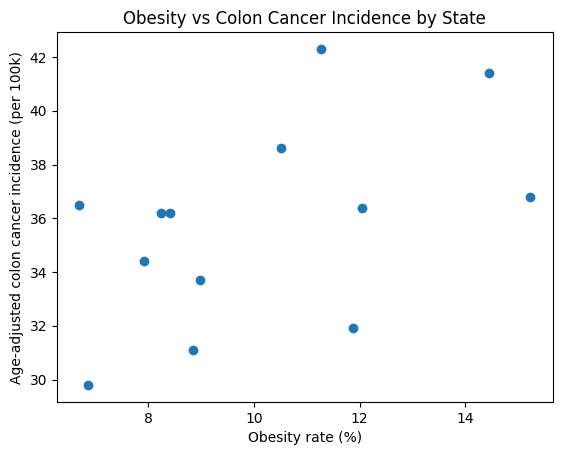

In [5]:
plt.scatter(merged["obesity_rate"], merged["incidence_rate_adj"])
plt.xlabel("Obesity rate (%)")
plt.ylabel("Age-adjusted colon cancer incidence (per 100k)")
plt.title("Obesity vs Colon Cancer Incidence by State")
plt.show()


**Observation:** States with higher obesity rates tend to have higher colon cancer incidence.  
Smoking rate shows weaker correlation, suggesting a less direct association.


In [6]:
X = merged[["obesity_rate", "smoking_rate"]]
X = sm.add_constant(X)
y = merged["incidence_rate_adj"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     incidence_rate_adj   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     3.573
Date:                Sat, 25 Oct 2025   Prob (F-statistic):             0.0675
Time:                        08:50:25   Log-Likelihood:                -31.391
No. Observations:                  13   AIC:                             68.78
Df Residuals:                      10   BIC:                             70.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4017      4.728      4.950   

The model indicates that obesity rate is a statistically significant predictor 
of colon cancer incidence at the state level, while smoking is not significant 
at the 0.05 level.


## Next Steps
1. Add Census ACS socioeconomic data (income, education, poverty rate)
2. Expand model to multivariate regression
3. Visualize with geographic heatmaps
